In [22]:
import pandas as pd

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
train = pd.read_csv('titanic.csv')

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

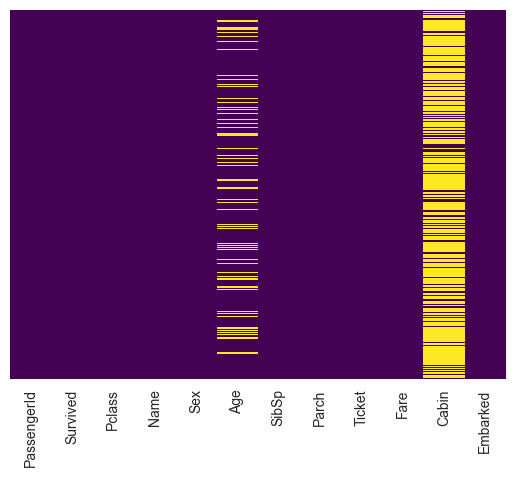

In [26]:
sns.heatmap(train.isnull(), yticklabels = False , cbar = False , cmap = 'viridis')

In [27]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

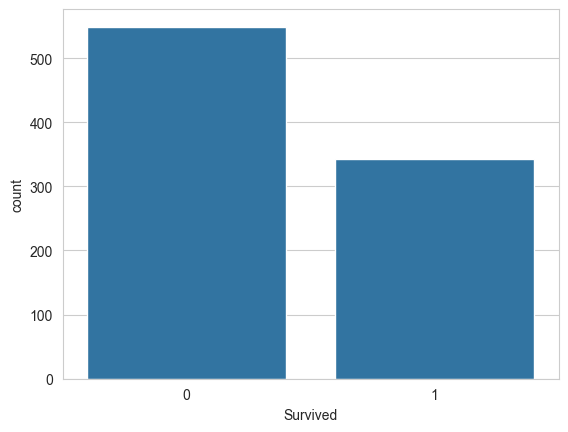

In [28]:
sns.countplot(x = 'Survived' , data = train)

<Axes: xlabel='Survived', ylabel='count'>

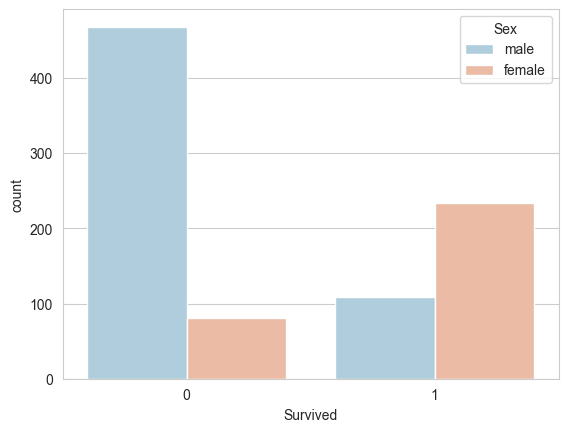

In [29]:
sns.countplot(x = 'Survived' ,hue = 'Sex',palette = 'RdBu_r',data = train)

<Axes: xlabel='Survived', ylabel='count'>

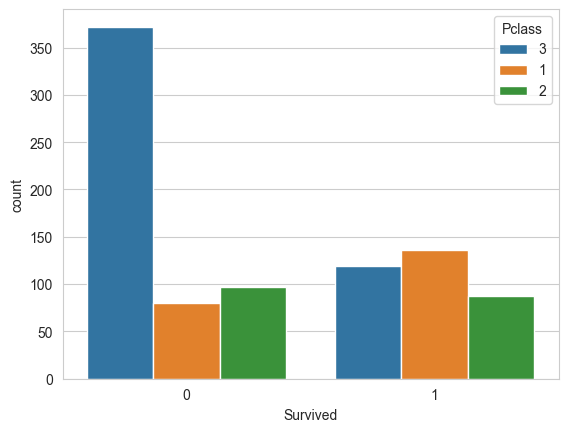

In [30]:

train['Pclass'] = train['Pclass'].astype(str)
sns.countplot(x = 'Survived' ,hue = 'Pclass', data = train)

C:\Users\sudda\AppData\Local\Temp\ipykernel_19932\1850767345.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

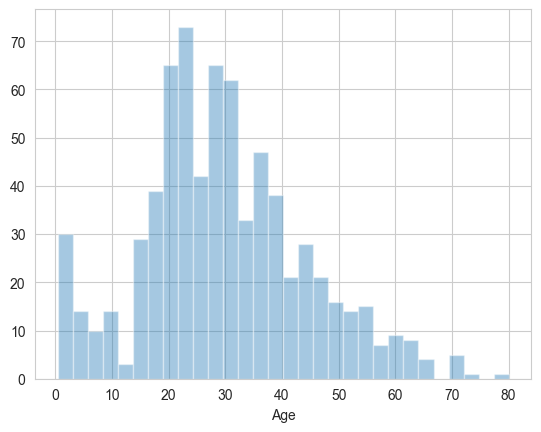

In [31]:
sns.distplot(train['Age'].dropna(),kde = False, bins = 30)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

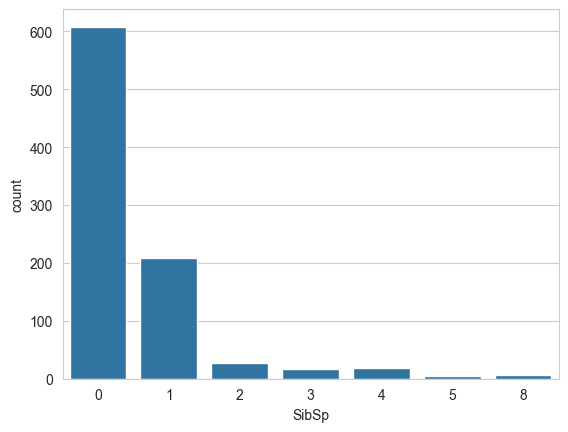

In [33]:
sns.countplot(x = 'SibSp',data = train)

<Axes: >

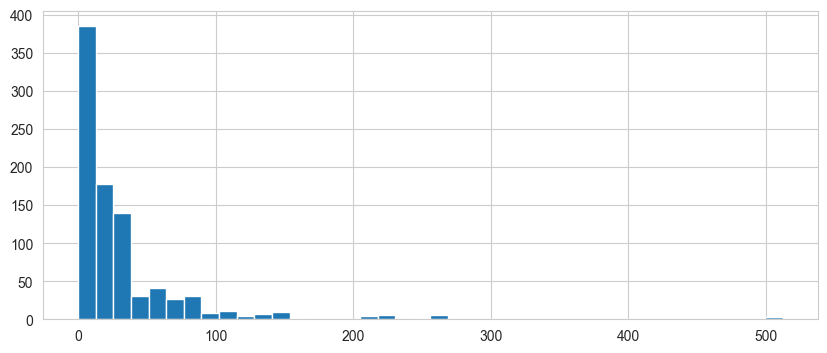

In [34]:
train['Fare'].hist(bins = 40 , figsize = (10,4))

In [35]:
import cufflinks as cf

In [36]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import cufflinks as cf

In [38]:
cf.go_offline()

In [39]:
train['Fare'].iplot(kind = 'hist' , bins = 50)

<Axes: xlabel='Pclass', ylabel='Age'>

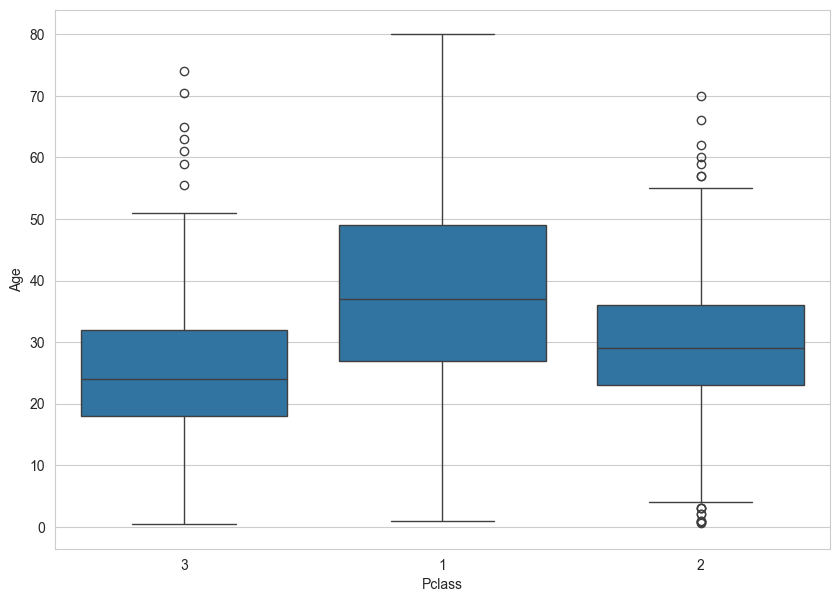

In [40]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass' , y = 'Age' , data = train)

In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [42]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

C:\Users\sudda\AppData\Local\Temp\ipykernel_19932\2056832368.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sudda\AppData\Local\Temp\ipykernel_19932\2056832368.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

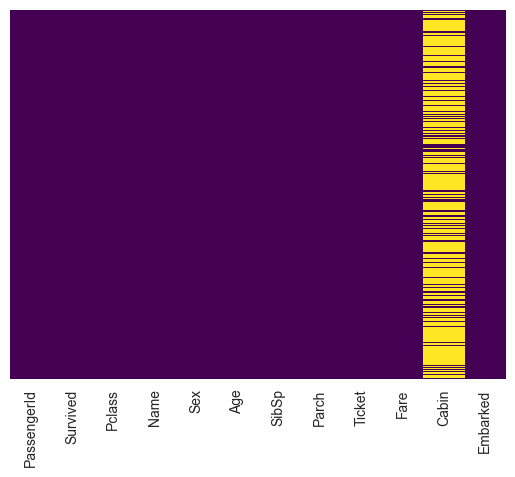

In [43]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [44]:
train.drop('Cabin' , axis = 1 ,inplace= True )

<Axes: >

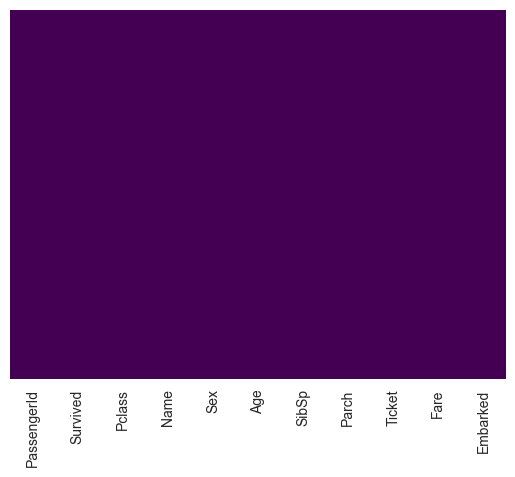

In [45]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [46]:
sex = pd.get_dummies(train['Sex'] , drop_first = True , dtype=np.int64)



In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [49]:
embark = pd.get_dummies(train['Embarked'], drop_first = True , dtype = np.int64)

In [50]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [51]:
train = pd.concat([train,sex,embark],axis = 1)

In [52]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [53]:
train.drop('PassengerId',axis = 1,inplace = True)

In [54]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [55]:
#Pclass is a Catagorical column
p = pd.get_dummies(train['Pclass'],dtype = np.int64)

In [56]:
p.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [57]:
p

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [58]:
train = pd.concat([train,p],axis = 1)

In [59]:
train.drop('Pclass',axis=1,inplace = True)

In [60]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,1


In [61]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

In [67]:
lr.fit(X_train,y_train)

C:\Users\sudda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [68]:
predictions = lr.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test,predictions)

array([[136,  18],
       [ 38,  76]], dtype=int64)